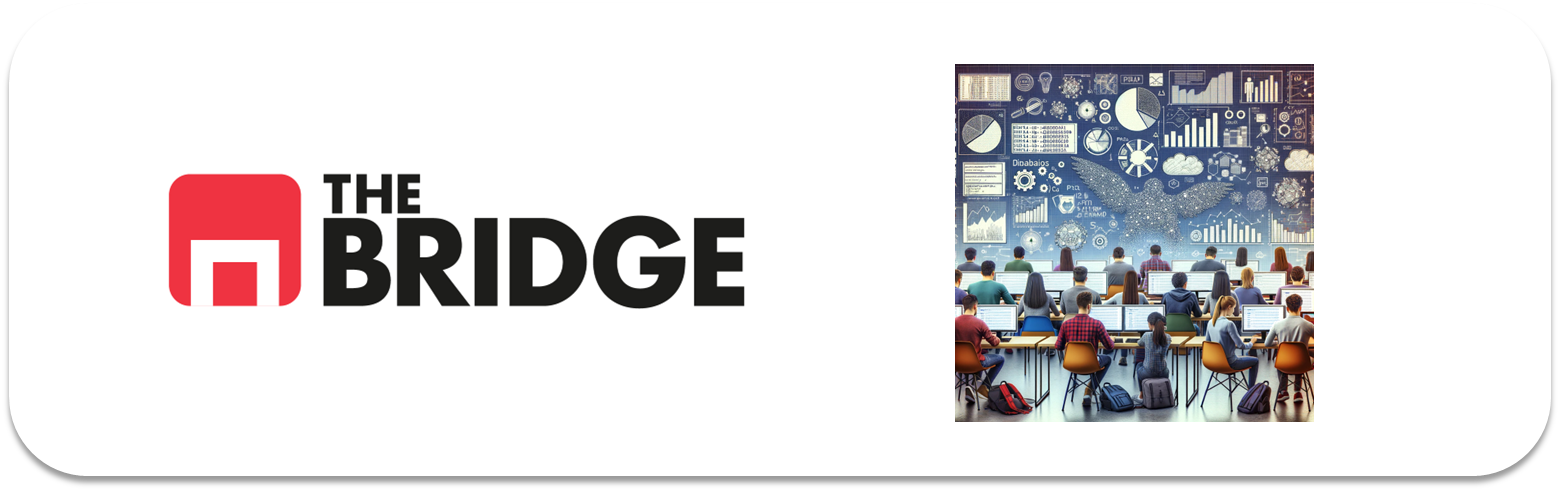

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [67]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [68]:
df= pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",sep="|")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: xlabel='MEDV', ylabel='Count'>

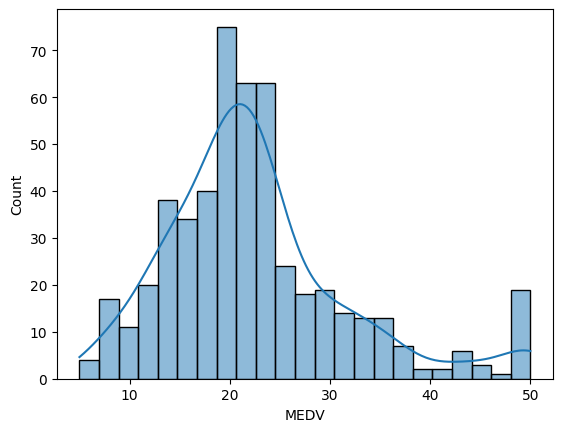

In [33]:
#viasualizacion target
sns.histplot(df["MEDV"], kde= True)
# a pesar de una ligera cola, tiene distrib casi normal

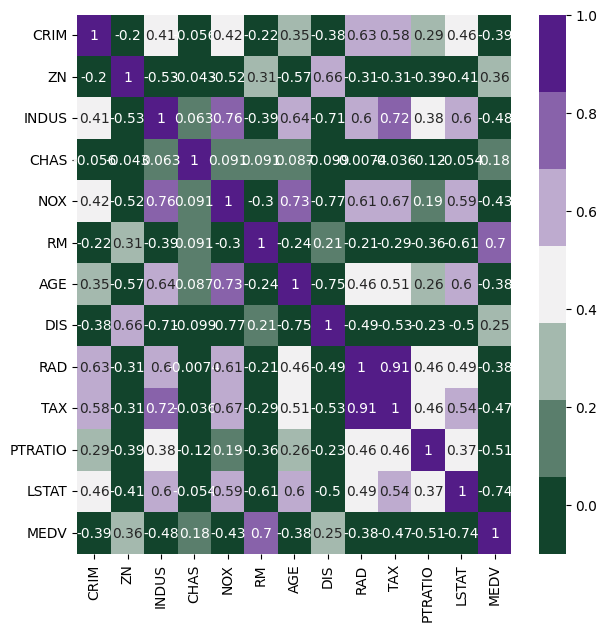

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

# target tiene alta corr con RM y alta corr inversa con LSTAT
# alguna corr entre otra variables, podriamos quitar algunas quizas (ej. TAX con INDUS con NOX)


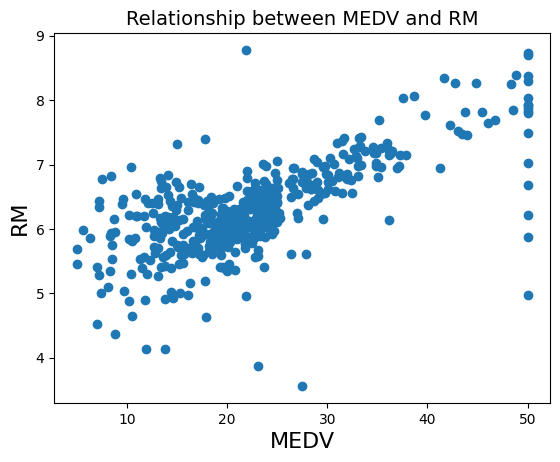

In [35]:
#miremos graficamente la correlacion entre el target y las variable de alta correlacion
plt.scatter(df['MEDV'], df['RM'])
plt.xlabel('MEDV', fontsize=16)
plt.ylabel('RM', fontsize=16)
plt.title("Relationship between MEDV and RM", fontsize=14)
plt.show()

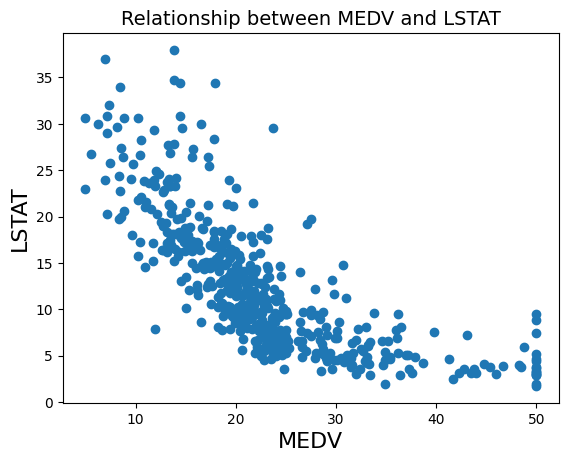

In [36]:
plt.scatter(df['MEDV'], df['LSTAT'])
plt.xlabel('MEDV', fontsize=16)
plt.ylabel('LSTAT', fontsize=16)
plt.title("Relationship between MEDV and LSTAT", fontsize=14)
plt.show()

In [69]:
# Split

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size= 0.2, random_state=42)

target = "MEDV"
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


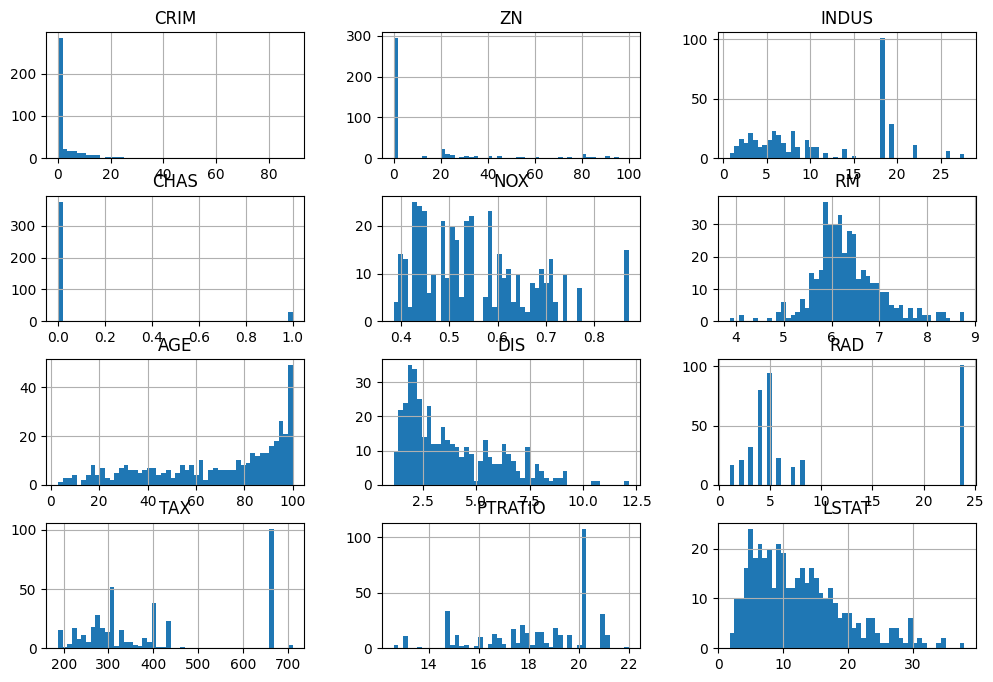

In [38]:
# Mini EDA
X_train.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [70]:
#numericas con target (en el 05 Proceso EDA; se hace comparacion con la target. Aqui no entiendo porque ya la separamos la tardet del nuestro set.)
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [71]:
columnas = corr_matrix.index.to_list()
columnas

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

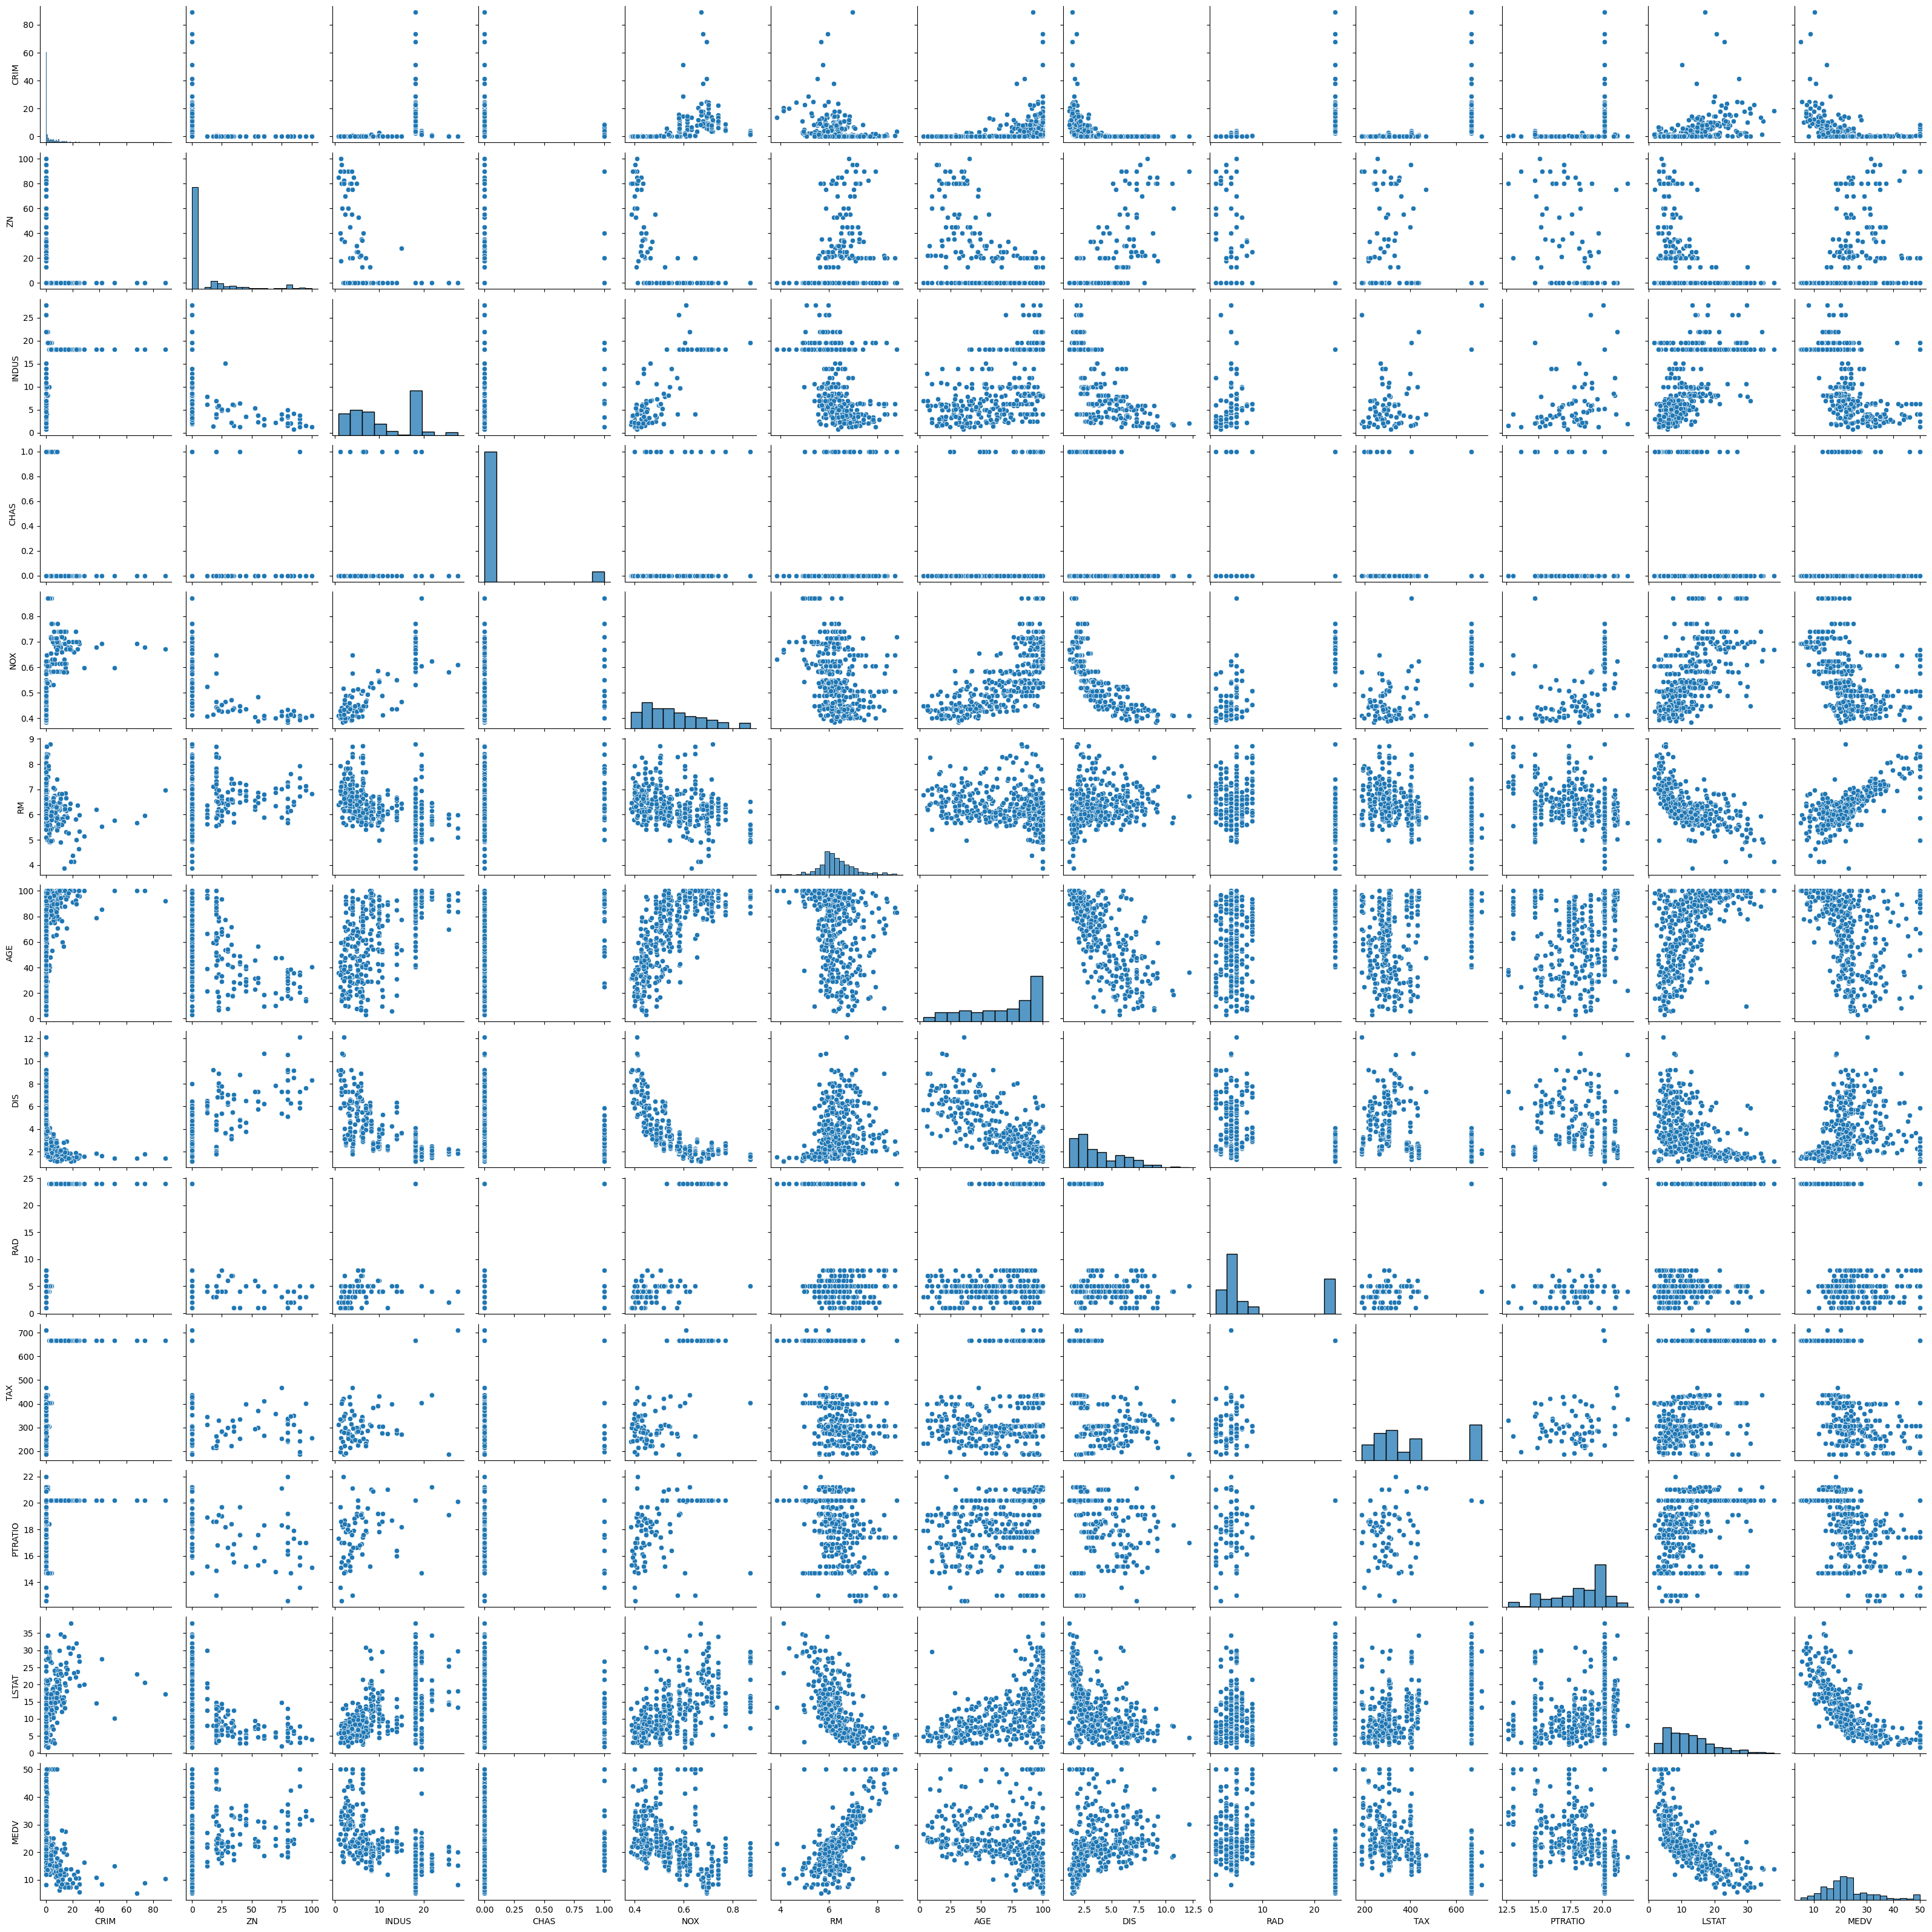

In [13]:
sns.pairplot(train_set[columnas]);

In [41]:
 #TAX con INDUS con NOX)
train_set['TAX'].corr(train_set['INDUS'])

np.float64(0.7023533219645564)

In [17]:
train_set['TAX'].corr(train_set['NOX'])

np.float64(0.6502467305812811)

In [18]:
train_set['INDUS'].corr(train_set['NOX']) # nos quedamos con una como features 

np.float64(0.7709570000478184)

In [19]:
train_set['RAD'].corr(train_set['CRIM']) # nos quedamos con CRIM como features

np.float64(0.6159465789597551)

In [72]:
features = ["RM","ZN", "DIS", "CRIM","NOX", "TAX", "INDUS", "PTRATIO", "LSTAT"] # quito CHAS y AGE por mas baja correlacion,"
 # me quedo con las features siguientes: PTRATIO y LSTAT por su correlacion lineal positiva y negativa con el target
 # entre RAD y NOX que tienen alta correlacion me quedo con MNOX solo y TAX e INDUS

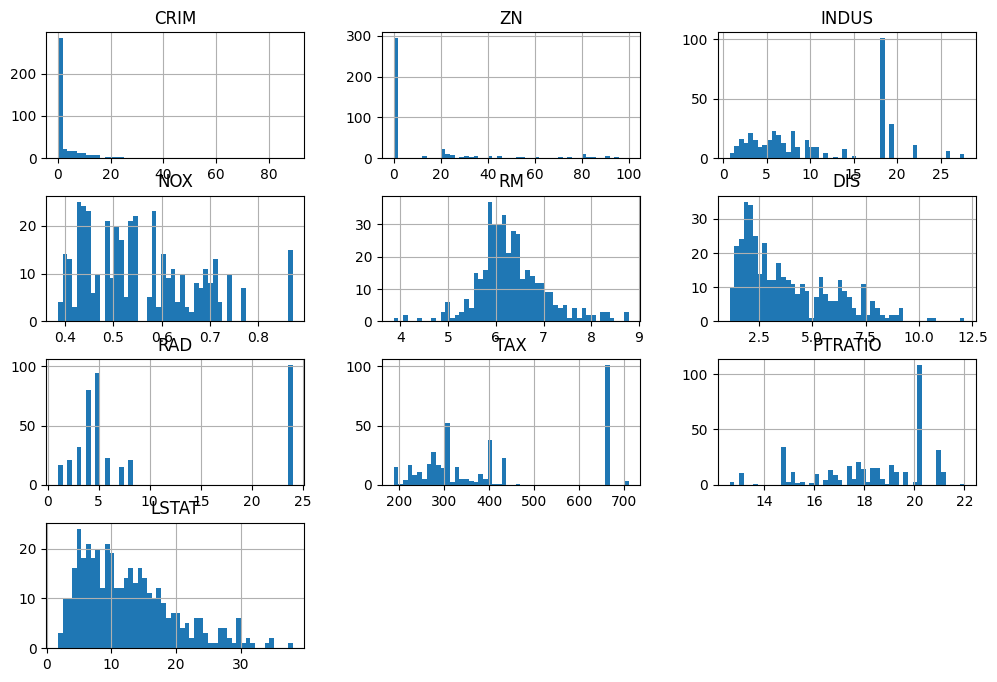

In [73]:
X_train.drop(columns= "CHAS", inplace= True)
X_train.drop(columns= "AGE", inplace= True)
X_train.hist(bins=50, figsize=(12, 8)) 
plt.show()


In [49]:
# min_max scaling = normalizacion para tener las variables en una misma unidad de peso sobre la target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
resultado_scaler = pd.DataFrame(scaler.fit_transform(X_train[features]), columns= features)
resultado_scaler

,RM,ZN,DIS,CRIM,NOX,TAX,INDUS,PTRATIO,LSTAT
0,0.293065,0.00,0.088307,0.168763,0.471193,0.914122,0.642963,0.808511,0.639625
1,0.400854,0.00,0.306359,0.006950,0.314815,0.229008,0.274074,0.893617,0.185982
2,0.440919,0.35,0.501150,0.000288,0.108848,0.223282,0.197037,0.457447,0.168322
3,0.455562,0.00,0.081132,0.079146,0.471193,0.914122,0.642963,0.808511,0.594923
4,0.379093,0.00,0.242514,0.008056,0.314815,0.229008,0.274074,0.893617,0.263521
...,...,...,...,...,...,...,...,...,...
399,0.401261,0.00,0.098337,0.001822,0.277778,0.375954,0.289630,0.882979,0.467163
400,0.405328,0.20,0.300030,0.003261,0.162551,0.068702,0.230370,0.638298,0.310982
401,0.563758,0.80,0.656039,0.000067,0.102881,0.177481,0.047037,0.468085,0.117550
402,0.562538,0.00,0.090489,0.125342,0.730453,0.914122,0.642963,0.808511,0.594371


In [ ]:
#from sklearn.preprocessing import StandardScaler
#std_scaler= StandardScaler()
#resultado_scaler= pd.DataFrame(std_scaler.fit_transform(X_train[features]), columns= features)
#resultado_scaler

,RM,ZN,DIS,CRIM,NOX,TAX,INDUS,PTRATIO,LSTAT
0,-1.428069,-0.500320,-0.802173,1.287702,0.489252,1.578434,1.033237,0.845343,1.753505
1,-0.680087,-0.500320,0.324349,-0.336384,-0.157233,-0.584648,-0.413160,1.204741,-0.561474
2,-0.402063,1.013271,1.330697,-0.403253,-1.008723,-0.602724,-0.715218,-0.637176,-0.651595
3,-0.300450,-0.500320,-0.839240,0.388230,0.489252,1.578434,1.033237,0.845343,1.525387
4,-0.831094,-0.500320,-0.005494,-0.325282,-0.157233,-0.584648,-0.413160,1.204741,-0.165787
...,...,...,...,...,...,...,...,...,...
399,-0.677264,-0.500320,-0.750355,-0.387850,-0.310348,-0.120700,-0.352167,1.159817,0.873419
400,-0.649038,0.364589,0.291651,-0.373414,-0.786706,-1.090773,-0.584520,0.126546,0.076412
401,0.450354,2.959318,2.130899,-0.405470,-1.033391,-0.747331,-1.303361,-0.592251,-0.910692
402,0.441886,-0.500320,-0.790898,0.851897,1.561057,1.578434,1.033237,0.845343,1.522570


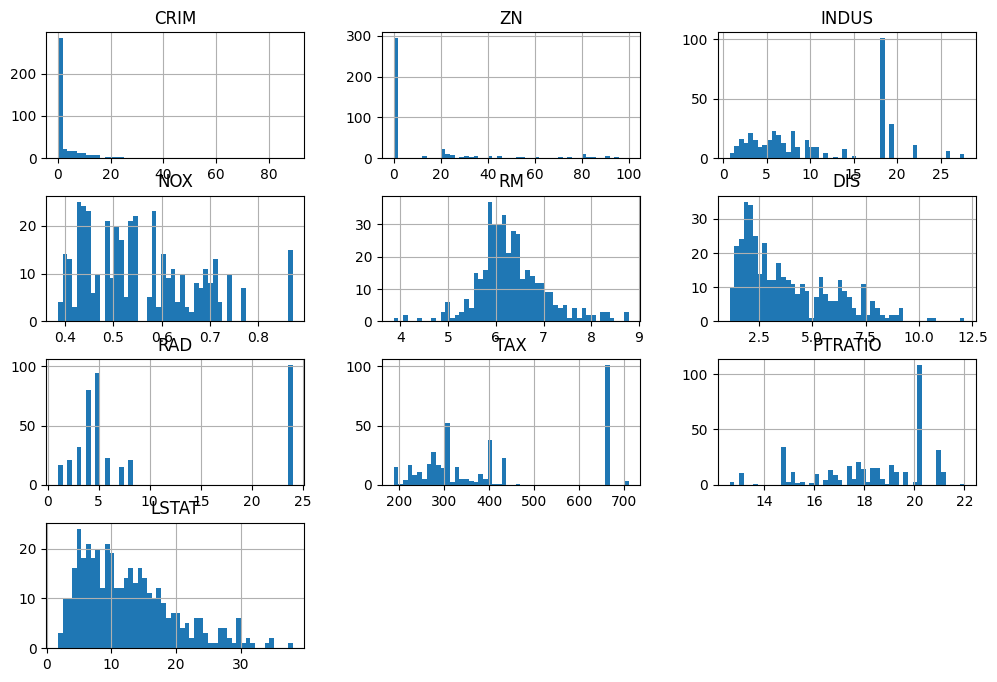

In [24]:
X_train.hist(bins=50, figsize=(12, 8)) 
plt.show()

In [74]:
# modelo de regresion lineal -> sobre variable numerica, supervisada

from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

# Entrenamos con los datos de train
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# valor en caso de que todas las featrues = 0
lm.intercept_
# y los coeficiente de peso de los parametros
lm.coef_

array([-1.34789129e-01,  3.30855707e-02,  4.63894058e-02, -1.72792599e+01,
        4.28190356e+00, -1.47257893e+00,  2.65059246e-01, -1.27186402e-02,
       -9.27893714e-01, -5.59471052e-01])

In [76]:
coef_df = pd.DataFrame(lm.coef_, X_train.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.134789
ZN,0.033086
INDUS,0.046389
NOX,-17.279260
RM,4.281904
DIS,-1.472579
RAD,0.265059
TAX,-0.012719
PTRATIO,-0.927894
LSTAT,-0.559471


In [77]:
# ajustamos el Test a las mismas transformaciones que hemos hecho en el train 
X_test.drop(columns= "CHAS", inplace= True)
X_test.drop(columns= "AGE", inplace= True)
print("Columnas Test eliminadas")
scaler_test = MinMaxScaler(feature_range= (0,1))
resultado_scaler_test = pd.DataFrame(scaler_test.fit_transform(X_test[features]), columns= features)
resultado_scaler_test
print("Normalizacion Test hecha")
std_scaler_test= StandardScaler()
resultado_scaler_test= pd.DataFrame(std_scaler_test.fit_transform(X_test[features]), columns= features)
resultado_scaler_test
print("Standarsizacion Test hecha")

# Creamos un objeto
lm_test = LinearRegression()

# Entrenamos con los datos de train
lm_test.fit(X_test, y_test)
print("Modelo de Regresion linear entrenado")
# valor en caso de que todas las features = 0
lm_test.intercept_
# y los coeficiente de peso de los parametros
lm_test.coef_
coef_df_test = pd.DataFrame(lm_test.coef_, X_test.columns, 
                      columns=['Coefficient'])
print(f"{coef_df_test}")

Columnas Test eliminadas
Normalizacion Test hecha
Standarsizacion Test hecha
Modelo de Regresion linear entrenado
         Coefficient
CRIM       -0.100375
ZN          0.112837
INDUS       0.053293
NOX       -23.854549
RM          0.867331
DIS        -1.667570
RAD         0.392032
TAX        -0.014455
PTRATIO    -1.215750
LSTAT      -0.554926


In [78]:
predictions = lm.predict(X_test)
predictions

array([29.23462872, 33.54151158, 14.07001553, 25.00958651, 17.99032385,
       23.35995169, 17.51259632, 13.76665497, 22.35353643, 20.4195388 ,
       22.12030798, 18.59723636, -4.73893625, 21.54129921, 19.39027477,
       25.58135888, 21.13279463,  4.57932819, 40.76624934, 16.61522212,
       27.35117694, 30.21656547, 11.37964888, 24.31745402, 18.00265891,
       15.51690826, 22.57059349, 18.2456088 , 19.64109808, 18.9636705 ,
       22.52723052, 25.28645378, 24.80125276, 17.54284114, 16.53120444,
       18.54489187, 31.54819593, 20.21047152, 21.01861618, 24.63621326,
       13.43081471, 32.61210275, 43.09475919, 17.00126892, 27.47208587,
       16.20195347, 14.35967525, 25.84590689, 19.40047004, 30.24948901,
       21.30658621, 34.65157349, 15.75075799, 26.17925397, 39.92686344,
       21.84391443, 18.02770535, 33.07475775, 25.06346097, 12.61589621,
       22.53199977, 30.64841963, 31.76695354, 17.07003385, 20.32665975,
       13.71520273, 19.62218933, 26.01078012, 30.89315023, 15.38

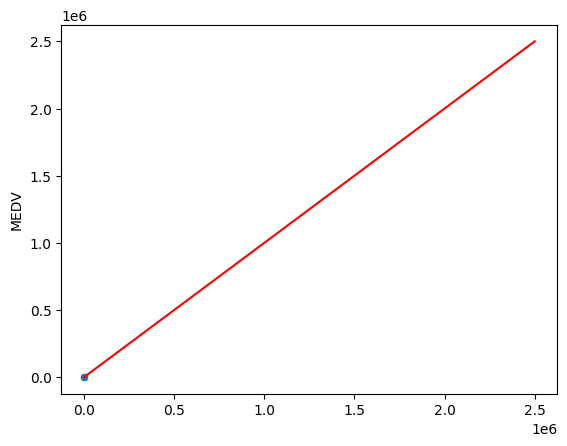

In [79]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,2.5e6],[0,2.5e6],'red')
plt.show()

In [80]:
# a ver que dicen las petricas de error si entiendo que paso?
from sklearn import metrics
pred_train = lm.predict(X_train)
print(" Train_set Errors:")
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))
print("++++++++++++++++++")
print(" Test_set Errors:")
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

 Train_set Errors:
MAE train 3.451621123389826
MSE train 23.17300602595211
RMSE train 4.813834856530924
R2 train 0.7332554613548956
++++++++++++++++++
 Test_set Errors:
MAE test 3.149919826368791
MSE test 22.905609417892336
RMSE test 4.785980507470996
R2 test 0.6876526966048391


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  1.57843444,
         0.84534281,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ..., -0.58464788,
         1.20474139, -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.60272378,
        -0.63717631, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.74733095,
        -0.59225149, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  1.57843444,
         0.84534281,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ..., -0.12069986,
         1.15981657, -0.25731635]], shape=(404, 10))

In [83]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#std_scaler= StandardScaler()
#resultado_scaler= pd.DataFrame(std_scaler.fit_transform(X_train[features]), columns= features)
#resultado_scaler

In [84]:
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        X_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef

,importance_standarized
RM,3.034042
RAD,2.273965
ZN,0.765064
INDUS,0.319441
CRIM,-1.194780
NOX,-2.031328
PTRATIO,-2.065437
TAX,-2.110873
DIS,-3.134513
LSTAT,-3.973126


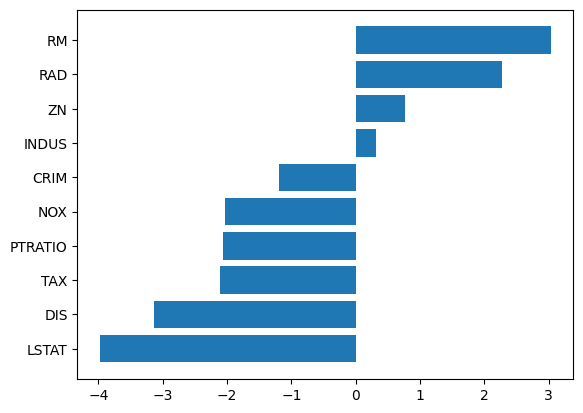

In [85]:
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

In [ ]:
# eliminamos mas variables menos importantes
X_train.drop(columns='ZN',inplace=True)
X_test.drop(columns='ZN',inplace=True)
X_train.drop(columns='INDUS',inplace=True)
X_test.drop(columns='INDUS',inplace=True)
X_train.drop(columns='CRIM',inplace=True)
X_test.drop(columns='CRIM',inplace=True)

lm2 = LinearRegression()
lm2.fit(X_train,y_train)

pred2 = lm2.predict(X_test)

print('MAE test', metrics.mean_absolute_error(y_test, pred2))
print('MSE test', metrics.mean_squared_error(y_test, pred2))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 test', lm2.score(X_test,y_test))

print(" OUPS parece que me he pasado, no sea mucho mejor")

MAE test 3.1652297220458774
MSE test 24.005492701987105
RMSE test 4.899540050044198
R2 test 0.6726543801851039
 OUPS parece que me he pasado, no sea mucho mejor


In [92]:
print("Train MSE:", metrics.mean_squared_error(y_train, lm2.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lm2.predict(X_test)))

Train MSE: 24.213007966065977
Test MSE: 24.005492701987105


In [93]:
# vamos a intentar regularizar con Ridge
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm2.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm2.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 24.21
Test MSE sin regularización: 24.01
Train MSE: 24.99
Test MSE: 24.96


In [ ]:
# hemos conseguido afinar bastante mas. Significa que no aprendio los datos de memoria

In [100]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.01)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm2.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm2.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 24.21
Test MSE sin regularización: 24.01
Train MSE: 24.2416
Test MSE: 24.1313


In [ ]:
# creo que No deberiamos usar la Lasso, ya hemos quitado suficientes variables in-necesarios, creo que seria demasiado